Car Price Prediction

1. Brands (BMW,Benz,Audi)
2. First plot data points on scatter plot chart to see if linear regresssion model can be applied.
3. If yes, then build a model that can answer following question.

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as numpy
import matplotlib.pyplot as plt


In [5]:

df= pd.read_csv("carprices.csv")
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


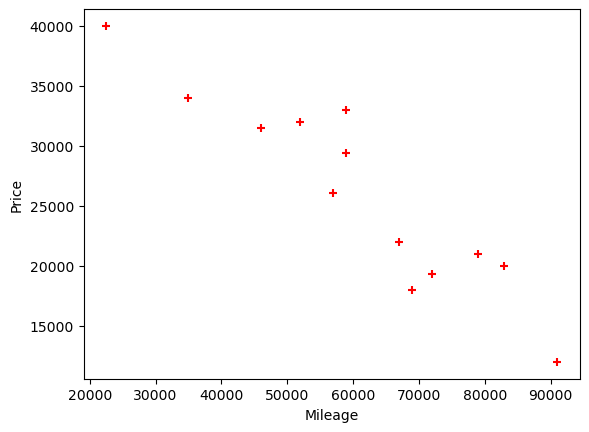

In [9]:
%matplotlib inline
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.scatter(df["Mileage"],df["Sell Price($)"],color="red",marker="+")
plt.show()

In [10]:
dummies = pd.get_dummies(df["Car Model"])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [11]:
merged = pd.concat([df,dummies],axis="columns")
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [12]:
final = merged.drop(['Car Model',"Mercedez Benz C class"],axis="columns")
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [13]:
model = LinearRegression()

In [16]:
X= final.drop('Sell Price($)',axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [18]:
y=final["Sell Price($)"]
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [19]:
model.fit(X,y)

LinearRegression()

In [21]:
model.predict([[69000,6,0,1]])

c:\Users\antov\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18705.2723644])

In [22]:
model.score(X,y)

0.9417050937281083

Price of benz that is 4 yr old with 45000 mileage

In [23]:
model.predict([[65000,4,0,0]])

c:\Users\antov\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([29588.87532285])

BMW X5 ,7 yo, 86k Mileage

In [24]:
model.predict([[86000,7,0,1]])

c:\Users\antov\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])